In [ ]:
!git clone https://github.com/heemmanshuu/facial_expressions

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214 (from 1)
Receiving objects: 100% (14214/14214), 239.65 MiB | 22.26 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Updating files: 100% (13996/13996), done.


In [ ]:
!git clone https://github.com/heemmanshuu/facial_expressions

fatal: destination path 'facial_expressions' already exists and is not an empty directory.


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import collections
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

seed=1234

IMAGE = 'image'
EMOTION = 'emotion'
DATASET = 'facial_expressions/'
images_path = DATASET + 'images'
csv_path = DATASET + 'data/legend.csv'

legend = pd.read_csv(csv_path)

In [ ]:
legend['emotion'].unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt', 'NEUTRAL', 'SADNESS', 'DISGUST', 'FEAR',
       'SURPRISE', 'ANGER', 'HAPPINESS'], dtype=object)

In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Parameters

epochs = 50
num_classes = 8  # Adjust based on your dataset (e.g., number of unique labels)
image_size = (256, 256)  # Adjust according to your model's input size
batch_size = 32

# File paths
csv_file = csv_path # Path to the CSV file
image_dir = images_path    # Directory where images are stored

# Load CSV file
df = pd.read_csv(csv_file)
df[EMOTION] = df[EMOTION].str.upper()


# Create full image paths
df['image_path'] = df['image'].apply(lambda x: os.path.join(image_dir, x))

# Convert labels to numerical values if needed
label_mapping = {label: idx for idx, label in enumerate(df['emotion'].unique())}
df['emotion'] = df['emotion'].map(label_mapping)

# Convert DataFrame to lists
image_paths = df['image_path'].tolist()
labels = df['emotion'].tolist()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical



train_size = int(0.8 * len(image_paths))  # 80% for training
train_image_paths = image_paths[:train_size]
train_labels = labels[:train_size]
train_labels = [str(item) for item in train_labels]
val_image_paths = image_paths[train_size:]
val_labels = labels[train_size:]
val_labels = [str(item) for item in val_labels]

train_df = pd.DataFrame({'filename': train_image_paths, 'label': train_labels})
val_df = pd.DataFrame({'filename': val_image_paths, 'label': val_labels})





# train_df['label'] = to_categorical(train_df['label'], num_classes=num_classes)
# val_df['label'] = to_categorical(val_df['label'], num_classes=num_classes)

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load data from DataFrame
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 10952 validated image filenames belonging to 8 classes.
Found 2738 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


343/343 ━━━━━━━━━━━━━━━━━━━━ 71s 195ms/step - accuracy: 0.4093 - loss: 4.9052 - val_accuracy: 0.4014 - val_loss: 1.4254
Epoch 2/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 65s 187ms/step - accuracy: 0.5116 - loss: 1.1795 - val_accuracy: 0.4021 - val_loss: 1.4557
Epoch 3/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 65s 186ms/step - accuracy: 0.5113 - loss: 0.9861 - val_accuracy: 0.4021 - val_loss: 1.5309
Epoch 4/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 64s 185ms/step - accuracy: 0.5272 - loss: 0.9623 - val_accuracy: 0.4021 - val_loss: 1.5613
Epoch 5/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 80s 180ms/step - accuracy: 0.5213 - loss: 0.9477 - val_accuracy: 0.4021 - val_loss: 1.5862
Epoch 6/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 100s 228ms/step - accuracy: 0.5291 - loss: 0.9433 - val_accuracy: 0.4021 - val_loss: 1.5964
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4198 - loss: 1.4224
Validation Loss: 1.4254, Validation Accuracy: 0.4014


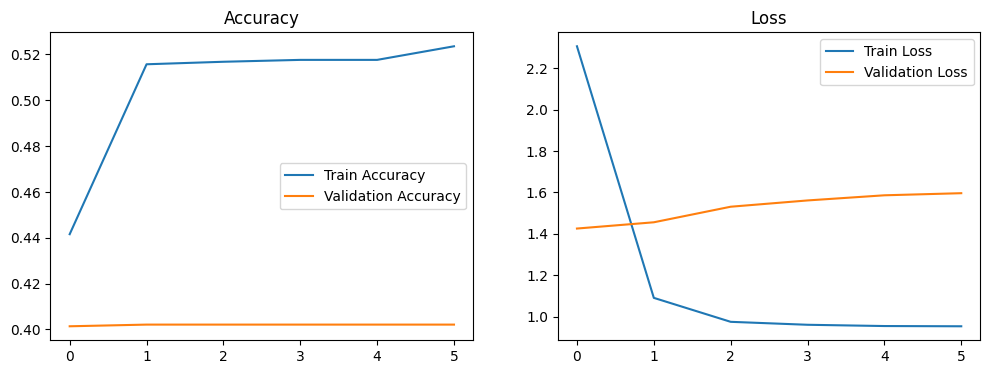

In [ ]:
# Define the neural network
model = Sequential([
    Flatten(input_shape=(image_size[0], image_size[1], 1)),  # Input shape for grayscale images
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])



# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
plot_model(model, to_file='nn_model_architecture.png', show_shapes=True, show_layer_names=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# Plot training/validation loss and accuracy
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 88s 227ms/step - accuracy: 0.4930 - loss: 1.0444 - val_accuracy: 0.4021 - val_loss: 1.7174
Epoch 2/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 71s 205ms/step - accuracy: 0.5133 - loss: 0.9690 - val_accuracy: 0.4021 - val_loss: 1.6561
Epoch 3/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 83s 204ms/step - accuracy: 0.5261 - loss: 0.9692 - val_accuracy: 0.4021 - val_loss: 1.5708
Epoch 4/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 73s 210ms/step - accuracy: 0.5152 - loss: 0.9625 - val_accuracy: 0.4021 - val_loss: 1.5792
Epoch 5/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 72s 205ms/step - accuracy: 0.5361 - loss: 0.9355 - val_accuracy: 0.4021 - val_loss: 1.7231
Epoch 6/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 83s 211ms/step - accuracy: 0.5201 - loss: 0.9378 - val_accuracy: 0.4186 - val_loss: 1.5272
Epoch 7/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 72s 204ms/step - accuracy: 0.5277 - loss: 0.9460 - val_accuracy: 0.4321 - val_loss: 1.6496
Epoch 8/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 72s 205ms/step - accuracy: 0.5300 - loss: 0

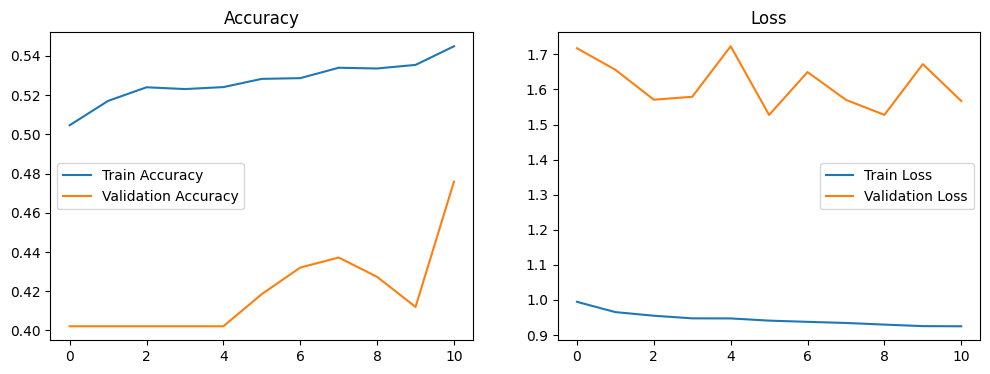

In [ ]:
# Define the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

plot_model(model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# Plot training/validation loss and accuracy
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history)